step1- import pandas


In [1]:
import pandas as pd

step-2: use updated sales file for analysis

In [2]:
filename="sales_updated.csv"
path=f'{filename}'
df=pd.read_csv(path)
path

'sales_updated.csv'

In [3]:
df

Date Region      Product  Amount Customer ID
0   2024-01-07  North     D1-Shirt  1000.0        C001
1   15/01/2024   EAst   G2-Blazers  1200.0        C004
2      24/2/20  SOUTH  K3-Trousers  1500.0        C003
3   2024-02-13  West       D1Shirt  2000.0        C002
4   2024-03-19  South     D1-Shirt     NaN        C003
5      13/3/24    NaN   G2-Blazers  1800.0        C001
6   2024-04-03  South  K3-Trousers     NaN        C002
7   21/04/2024   East   G2-Blazers  2500.0        C004
8   2024-05-15   West  K3-Trousers  1500.0        C001
9      27/5/24  North  K3-Trousers  1500.0        C004
10  2024-06-16  South     D1-Shirt  3000.0        C003
11  2024-06-24   East   g2-Blazers  2000.0        C002

- Rules for Region column

        - All Region entries should be in title case
        - Blazers are only sold in one Region

- Find the anomalies in Region column based on the above Rules


In [4]:
        # - All Region entries should be in title case
df['Region']=df['Region'].str.title()
df

Date Region      Product  Amount Customer ID
0   2024-01-07  North     D1-Shirt  1000.0        C001
1   15/01/2024   East   G2-Blazers  1200.0        C004
2      24/2/20  South  K3-Trousers  1500.0        C003
3   2024-02-13  West       D1Shirt  2000.0        C002
4   2024-03-19  South     D1-Shirt     NaN        C003
5      13/3/24    NaN   G2-Blazers  1800.0        C001
6   2024-04-03  South  K3-Trousers     NaN        C002
7   21/04/2024   East   G2-Blazers  2500.0        C004
8   2024-05-15   West  K3-Trousers  1500.0        C001
9      27/5/24  North  K3-Trousers  1500.0        C004
10  2024-06-16  South     D1-Shirt  3000.0        C003
11  2024-06-24   East   g2-Blazers  2000.0        C002

Since Blazers are only sold in one region we can assume from data rows where region is NaN should be South and fill those values in Region column with 'South'

In [5]:
df['Region']=df['Region'].fillna('South')
df

Date Region      Product  Amount Customer ID
0   2024-01-07  North     D1-Shirt  1000.0        C001
1   15/01/2024   East   G2-Blazers  1200.0        C004
2      24/2/20  South  K3-Trousers  1500.0        C003
3   2024-02-13  West       D1Shirt  2000.0        C002
4   2024-03-19  South     D1-Shirt     NaN        C003
5      13/3/24  South   G2-Blazers  1800.0        C001
6   2024-04-03  South  K3-Trousers     NaN        C002
7   21/04/2024   East   G2-Blazers  2500.0        C004
8   2024-05-15   West  K3-Trousers  1500.0        C001
9      27/5/24  North  K3-Trousers  1500.0        C004
10  2024-06-16  South     D1-Shirt  3000.0        C003
11  2024-06-24   East   g2-Blazers  2000.0        C002

-- ensuring if Region has 12 non-null fields

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         12 non-null     object 
 1   Region       12 non-null     object 
 2   Product      12 non-null     object 
 3   Amount       10 non-null     float64
 4   Customer ID  12 non-null     object 
dtypes: float64(1), object(4)
memory usage: 608.0+ bytes


-- Checking date values to find anomalies

In [7]:
df.Date

0     2024-01-07
1     15/01/2024
2        24/2/20
3     2024-02-13
4     2024-03-19
5        13/3/24
6     2024-04-03
7     21/04/2024
8     2024-05-15
9        27/5/24
10    2024-06-16
11    2024-06-24
Name: Date, dtype: object

-- creating a function for applying through Date column to identify and format Date values in each row to a standard format

In [8]:

def fix_dates(date_str):
    if isinstance(date_str, str):
        if date_str.count('/') == 2:
            date_parts = date_str.split('/')
            
            if len(date_parts[2]) == 4:
                date_str = '-'.join([date_parts[2], date_parts[1], date_parts[0]])
            else:
                date_str = '-'.join([str(2000 + int(date_parts[2])), date_parts[1], date_parts[0]])
            
            date_str = pd.to_datetime(date_str).strftime('%Y-%m-%d')
    
    return date_str



--apply fix_dates to Date column

In [9]:
df['Date'].apply(fix_dates)

0     2024-01-07
1     2024-01-15
2     2020-02-24
3     2024-02-13
4     2024-03-19
5     2024-03-13
6     2024-04-03
7     2024-04-21
8     2024-05-15
9     2024-05-27
10    2024-06-16
11    2024-06-24
Name: Date, dtype: object

Add Updated Values to date column

In [10]:
df['Date']=df['Date'].apply(fix_dates)
df

Date Region      Product  Amount Customer ID
0   2024-01-07  North     D1-Shirt  1000.0        C001
1   2024-01-15   East   G2-Blazers  1200.0        C004
2   2020-02-24  South  K3-Trousers  1500.0        C003
3   2024-02-13  West       D1Shirt  2000.0        C002
4   2024-03-19  South     D1-Shirt     NaN        C003
5   2024-03-13  South   G2-Blazers  1800.0        C001
6   2024-04-03  South  K3-Trousers     NaN        C002
7   2024-04-21   East   G2-Blazers  2500.0        C004
8   2024-05-15   West  K3-Trousers  1500.0        C001
9   2024-05-27  North  K3-Trousers  1500.0        C004
10  2024-06-16  South     D1-Shirt  3000.0        C003
11  2024-06-24   East   g2-Blazers  2000.0        C002

-- modify Date column to appropriate datatype i.e datetime

In [11]:
df['Date']=pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         12 non-null     datetime64[ns]
 1   Region       12 non-null     object        
 2   Product      12 non-null     object        
 3   Amount       10 non-null     float64       
 4   Customer ID  12 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 608.0+ bytes


-- For Monthly Analysis, we need a month column that contains month part of the Dates given

In [12]:
df['Month']=df.Date.dt.month
df.head()

Date Region      Product  Amount Customer ID  Month
0 2024-01-07  North     D1-Shirt  1000.0        C001      1
1 2024-01-15   East   G2-Blazers  1200.0        C004      1
2 2020-02-24  South  K3-Trousers  1500.0        C003      2
3 2024-02-13  West       D1Shirt  2000.0        C002      2
4 2024-03-19  South     D1-Shirt     NaN        C003      3

  - Fill missing values in Amount with the average amount for that product (Bonus question)


-- Check if product col has standardised values since we need it for 'group by' for mean amount over product

In [13]:
df.Product.unique()

array(['D1-Shirt', 'G2-Blazers', 'K3-Trousers', 'D1Shirt', 'g2-Blazers'],
      dtype=object)

-- Fixing anomalies in Product column's data

In [14]:
df['Product'] = df['Product'].str.replace(r'(\d+)([A-Za-z]+)', r'\1-\2', regex=True)
df['Product'] = df['Product'].str.title() 
df.Product.unique()

array(['D1-Shirt', 'G2-Blazers', 'K3-Trousers'], dtype=object)

-- Now perform mean of amount over partition by product and fill it in amount col where it has null data

In [16]:
df['Amount'] = df['Amount'].fillna(df.groupby('Product')['Amount'].transform('mean'))
df.Amount

0     1000.0
1     1200.0
2     1500.0
3     2000.0
4     2000.0
5     1800.0
6     1500.0
7     2500.0
8     1500.0
9     1500.0
10    3000.0
11    2000.0
Name: Amount, dtype: float64

- P1> Find which month had the highest sales

In [17]:

df_pvt=df.pivot_table(
    index='Month',
    values='Amount',
    aggfunc='sum'
).sort_values(by='Amount' , ascending=False)
df_pvt.head(1)

Amount
Month        
6      5000.0

- P2> Plot region wise sales data showing the highest sales first


-- check Region Column if it has anomalies

In [18]:
df.Region.unique()

array(['North', 'East', 'South', 'West ', 'West'], dtype=object)

-- Remove extra space from West

In [19]:
df['Region']=df.Region.replace({
        'West ': 'West'
    },
    regex=True
)
df.Region.unique()

array(['North', 'East', 'South', 'West'], dtype=object)

- create a pivot table for region wise Sales data

In [20]:
df_pvt=df.pivot_table(
    index='Region',
    values='Amount',
    aggfunc='sum'
).sort_values(by='Amount', ascending=False)

- Plot the pivot table data and give label to the chart

<Axes: title={'center': 'Region Wise Sales'}, xlabel='Region'>

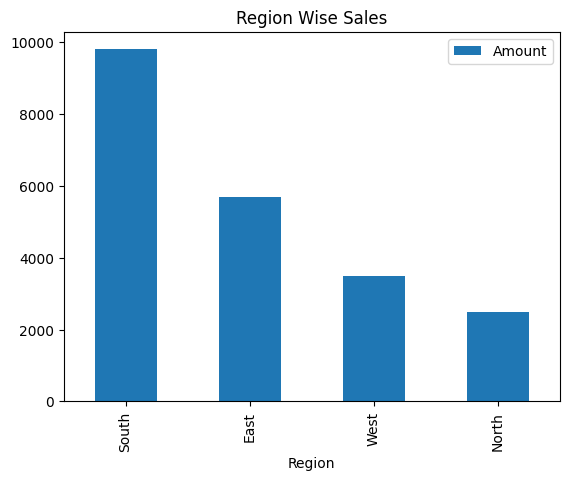

In [21]:
ax=df_pvt.plot(kind='bar', legend=True, title='Region Wise Sales')
ax

- P3> Plot month wise sales data. What is your inference from this plot?


- Check if month has anomalies since it is required for grouping

In [23]:
df.Month.unique()

array([1, 2, 3, 4, 5, 6], dtype=int32)

- calculate sum of amount over grouping the columns by Month

In [22]:
df_pvt=df.groupby('Month')['Amount'].sum()
df_pvt

Month
1    2200.0
2    3500.0
3    3800.0
4    4000.0
5    3000.0
6    5000.0
Name: Amount, dtype: float64

- Plot the above calculated result

<Axes: title={'center': 'Month Wise Sales Data'}, xlabel='Month'>

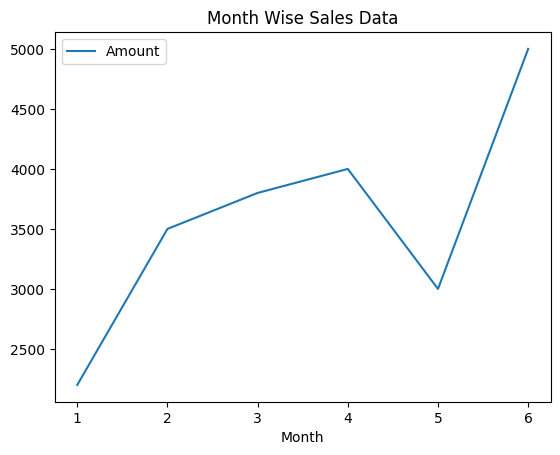

In [24]:
df_pvt.plot(kind='line', legend=True, title='Month Wise Sales Data')

# Inference from the Plot:
General Trend: The sales data shows an increasing trend from month 1 to month 4, with sales gradually rising from 2200 to 4000. After month 4, there is a sharp dip in month 5 (down to 3000), but sales recover in month 6, peaking at 5000.

Fluctuations: There is a noticeable fluctuation in month 5 where sales drop sharply. This could indicate a seasonal dip, a particular event, or an external factor affecting sales during that period.

Month with Peak Sales: Month 6 has the highest sales, which could indicate a peak period, such as a seasonal spike, promotional period, or increased demand.

Month with Lowest Sales: Month 1 has the lowest sales, which could suggest a slower start or lower demand in the initial period.